## Final Project Submission

Please fill out:
* Student name: **Parker Lumkes**
* Student pace: **Full-time**
* Scheduled project review date/time: **TBD**
* Instructor name: **Rafael Carrasco**
* Blog post URL: **TBD**


### Checklist

* Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)
* You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.
* Your model should not include any predictors with p-values greater than .05.
* Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.
* You provide at least 1 paragraph explaining your final model.
* You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.

### Column Definitions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Questions to be answered by EDA 

* Are there null values that need to be taken care of?
* Are there outliers that are throwing off normal-ish distribution?
* Is there multicolinearity among predictor variables?
* Do any of the predictor variables need to be transformed/normalized/standardized?
* Do seasons have an effect on the home price?
* Which grade do we see most frequently?

## Importing libraries & reading-in the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

raw_df = pd.read_csv('kc_house_data.csv')

In [525]:
raw_df_keep.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning data

### Dropping columns

In [2]:
raw_df.drop('id', axis=1, inplace=True) # unnecessary
raw_df.drop('waterfront', axis=1, inplace=True) # dropped because there were less than 150 positive values
raw_df.drop('view', axis=1, inplace=True) # dropped because 90% of values were 0.0

In [3]:
raw_df_keep = raw_df.copy() 
#keeping the raw dataframe after dropping superfluous columns for comparisons & sanity checks

### Deal with outliers & NaN's

In [4]:
raw_df.drop(raw_df[raw_df.bedrooms > 7].index, inplace=True)
raw_df.drop(raw_df[raw_df.grade > 11].index, inplace=True)
raw_df.drop(raw_df[raw_df.grade ==4].index, inplace=True)
raw_df.drop(raw_df[raw_df.sqft_living > 6000].index, inplace=True)
raw_df.drop(raw_df[raw_df.price > 3850000.0].index, inplace=True)
raw_df.drop(raw_df[raw_df.sqft_lot > 40000].index, inplace=True)
raw_df.drop(raw_df[raw_df.bathrooms > 3.25].index, inplace=True)
raw_df.drop(raw_df[raw_df.bathrooms < 1.00].index, inplace=True)
raw_df.drop(raw_df[raw_df.floors > 2.0].index, inplace=True)
raw_df.drop(raw_df[raw_df.condition < 3].index, inplace=True)
raw_df.drop(raw_df[raw_df.sqft_lot > 30000].index, inplace=True)

In [5]:
raw_df.yr_renovated.fillna(0.0, inplace=True)

### Change date to date-time object

In [6]:
new_date = pd.to_datetime(raw_df.date)

### Change ft<sup>2</sup> basement to float & replace NaN's

In [7]:
raw_df.sqft_basement.replace(to_replace='?', value=100000.0, inplace=True)
raw_df.sqft_basement = raw_df.sqft_basement.astype(float)
raw_df.sqft_basement.replace(to_replace=100000.0, value=np.median(raw_df.sqft_basement), inplace=True)

### Dummy variables for categorical data

In [8]:
bed_dum = pd.get_dummies(raw_df.bedrooms, prefix='bed')
bath_dum = pd.get_dummies(raw_df.bathrooms, prefix='bath')
flr_dum = pd.get_dummies(raw_df.floors, prefix='flr')
cond_dum = pd.get_dummies(raw_df.condition, prefix='cond')
grd_dum = pd.get_dummies(raw_df.grade, prefix='grd')

In [9]:
def dum_drop(dum):
    dum = dum.drop(dum.columns[-1], axis=1, inplace=True)
    return None

In [10]:
# dropping one column from each to avoid multicollinearity issues 
dummies = [bed_dum, bath_dum, flr_dum, cond_dum, grd_dum]

for dummy in dummies:
    dum_drop(dummy)

### Put it all together

In [11]:
raw_df = raw_df.drop(['date', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade'], axis=1)

In [12]:
raw_df = pd.concat([raw_df, new_date, bed_dum, bath_dum, flr_dum, cond_dum, grd_dum], axis=1)

In [13]:
df = raw_df
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,flr_1.0,flr_1.5,cond_3,cond_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10
0,221900.0,1180,5650,1180,0.0,1955,0.0,98178,47.5112,-122.257,...,1,0,1,0,0,0,1,0,0,0
1,538000.0,2570,7242,2170,400.0,1951,1991.0,98125,47.7210,-122.319,...,0,0,1,0,0,0,1,0,0,0
2,180000.0,770,10000,770,0.0,1933,0.0,98028,47.7379,-122.233,...,1,0,1,0,0,1,0,0,0,0
3,604000.0,1960,5000,1050,910.0,1965,0.0,98136,47.5208,-122.393,...,1,0,0,0,0,0,1,0,0,0
4,510000.0,1680,8080,1680,0.0,1987,0.0,98074,47.6168,-122.045,...,1,0,1,0,0,0,0,1,0,0


In [14]:
raw_df_keep.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [15]:
target = df['price']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17890 entries, 0 to 21595
Data columns (total 38 columns):
price            17890 non-null float64
sqft_living      17890 non-null int64
sqft_lot         17890 non-null int64
sqft_above       17890 non-null int64
sqft_basement    17890 non-null float64
yr_built         17890 non-null int64
yr_renovated     17890 non-null float64
zipcode          17890 non-null int64
lat              17890 non-null float64
long             17890 non-null float64
sqft_living15    17890 non-null int64
sqft_lot15       17890 non-null int64
date             17890 non-null datetime64[ns]
bed_1            17890 non-null uint8
bed_2            17890 non-null uint8
bed_3            17890 non-null uint8
bed_4            17890 non-null uint8
bed_5            17890 non-null uint8
bed_6            17890 non-null uint8
bath_1.0         17890 non-null uint8
bath_1.25        17890 non-null uint8
bath_1.5         17890 non-null uint8
bath_1.75        17890 non-null uint

In [472]:
len(df.columns)

38

### What is the correlations between our dependent and independent variables?

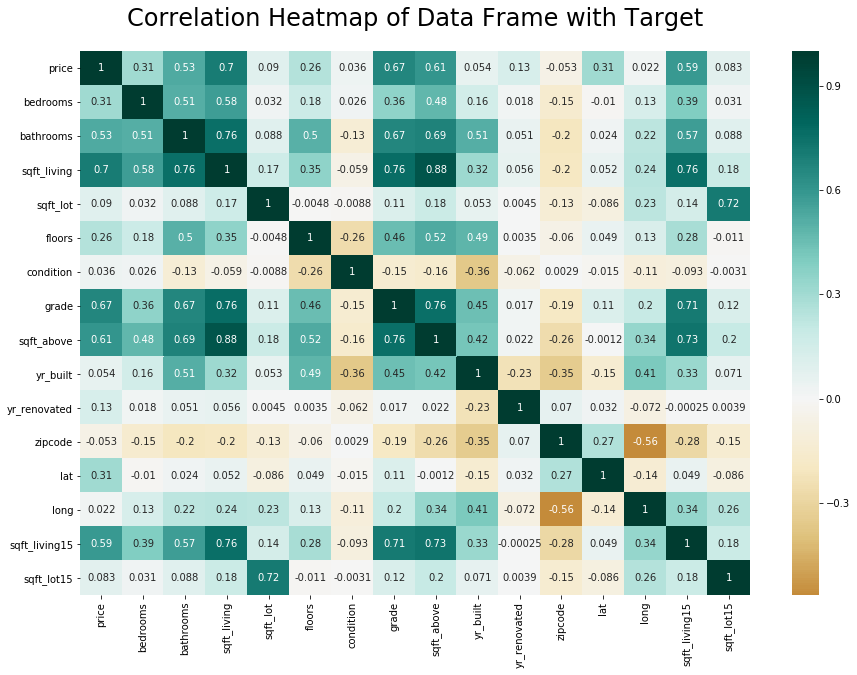

In [126]:
plt.figure(figsize=(15,10))
plt.title("Correlation Heatmap of Data Frame with Target", fontdict={'fontsize':24}, pad=25)
sns.heatmap(raw_df_keep.corr(), center=0, annot=True, cmap="BrBG");

Here we see that these variables have a moderatly strong relationship with the target
* bathrooms
* sqft_living
* grade
* sqft_above
* sqft_living_15

### Checking for variable correlation to avoid multicolinearity 

In [18]:
df_possible = raw_df_keep.drop('price', axis=1)

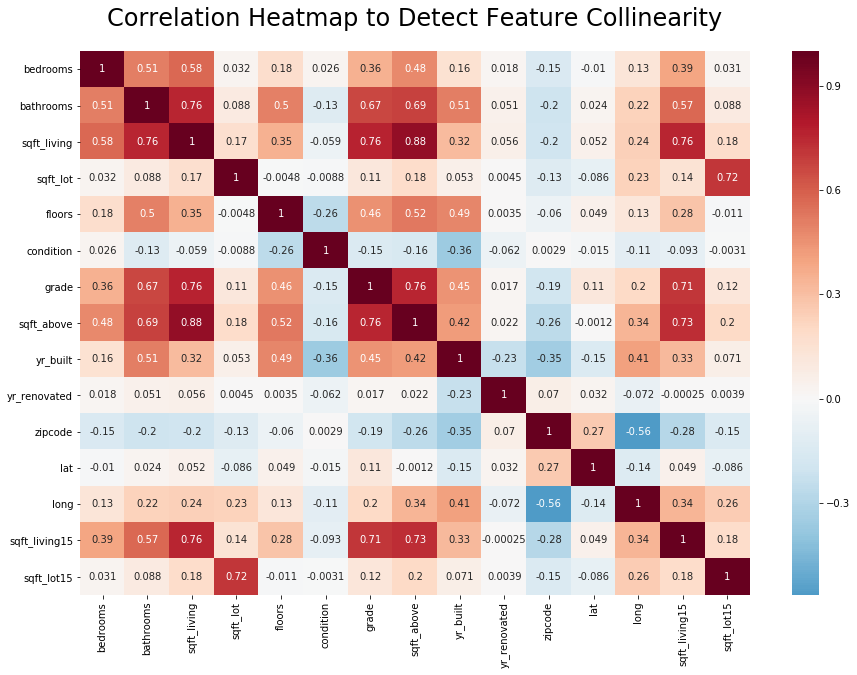

In [128]:
plt.figure(figsize=(15,10))
plt.title("Correlation Heatmap to Detect Feature Collinearity", fontdict={'fontsize':24}, pad=25)
sns.heatmap(df_possible.corr(), center=0, annot=True, cmap="RdBu_r");

> Unsuprisingly, most of the ft<sup>2</sup> variables have a high correlation. Since sqft_living had the highest correlation with the target, we will only use it in a model, unless we need to return to the drawing board later.

For example:

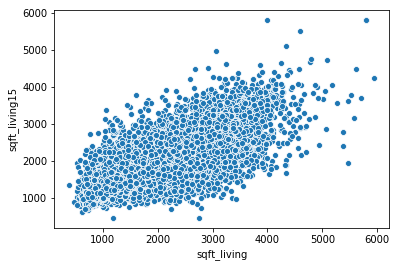

In [20]:
sns.scatterplot(x=df.sqft_living, y=df.sqft_living15)

> The ft<sup>2</sup> of the home and its '15 counterparts are correlated and would be colinear with the target. We will not be using the latter.

### Taking a closer look at grade

In [21]:
raw_df_keep['grade'].value_counts(normalize=True)

7     0.415521
8     0.280826
9     0.121082
6     0.094365
10    0.052507
11    0.018475
5     0.011205
12    0.004121
4     0.001250
13    0.000602
3     0.000046
Name: grade, dtype: float64

In [22]:
grade_df = pd.DataFrame(raw_df_keep['grade'].value_counts())

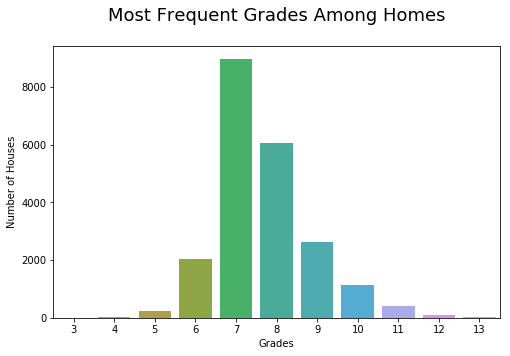

0.4155206741677085


In [157]:
plt.figure(figsize=(8,5))
plt.title("Most Frequent Grades Among Homes", fontdict={'fontsize':18}, pad=25)
freq_plot = sns.barplot(x=grade_df.index, y=grade_df.grade, data=grade_df);
freq_plot.set(xlabel='Grades', ylabel='Number of Houses')
plt.show()
print(grade_df['grade'].iloc[0] / (sum(grade_df['grade'])))

> We see here that grade 7 has more than 2,000 more houses than the next closest grade, and claims a little over 40% of the entire data set.

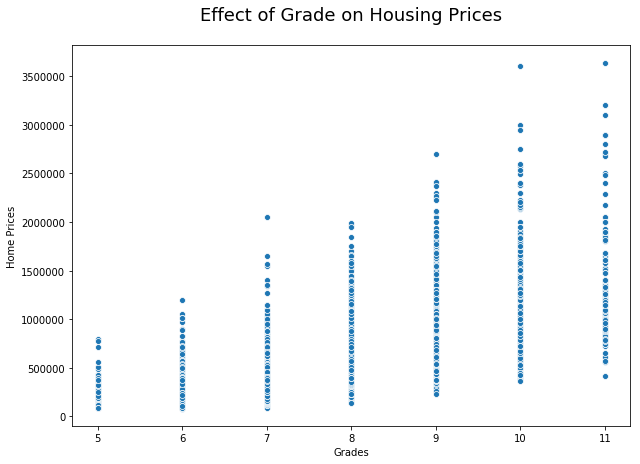

In [164]:
plt.figure(figsize=(10,7))
plt.title("Effect of Grade on Housing Prices", fontdict={'fontsize':18}, pad=25)
price_grade = sns.scatterplot(raw_df_keep.grade, target)
price_grade.set(xlabel='Grades', ylabel='Home Prices')
plt.show()

> We saw earlier that grade is also correlated with the target. Here we see that, indeed, as the grade increases, generally so does the price of the house. Something else that should be noted is that the price range among the low grades is not commensurate with that of the high grades. In other words, you can find inexpensive homes among the higher grades, but you can't find expensive homes among the lower grades.

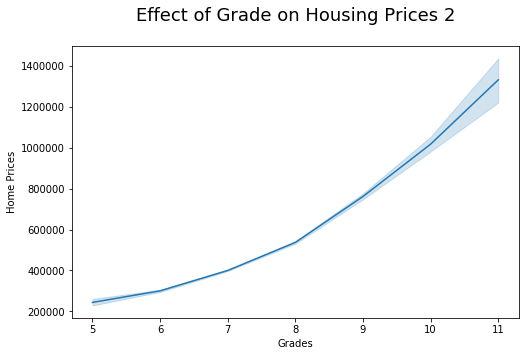

In [162]:
plt.figure(figsize=(8,5))
plt.title("Effect of Grade on Housing Prices 2", fontdict={'fontsize':18}, pad=25)
price_grade2 = sns.lineplot(raw_df_keep.grade, target)
price_grade2.set(xlabel='Grades', ylabel='Home Prices')
plt.show()

> Here's the same thing but a different style graph. It looks much more clear cut here that grade would affect the price. What worries me, however, is the scatter plot above. Wouldn't the fact that you can find highly-graded homes for a wide range of prices prevent grade from being an ideal predictor?

### Feature engineer seasons

We know intuitively that seasons can affect prices on many kinds of consumer goods. Using the date the homes were sold, let's see what we can gather by grouping those dates into seasons. 

In [26]:
import datetime

In [27]:
df.date.dt.month_name().head()

0     October
1    December
2    February
3    December
4    February
Name: date, dtype: object

In [28]:
df_with_seasons = df.copy()

In [29]:
df_with_seasons['months'] = df_with_seasons.date.dt.month_name()
df_with_seasons.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,flr_1.5,cond_3,cond_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,months
0,221900.0,1180,5650,1180,0.0,1955,0.0,98178,47.5112,-122.257,...,0,1,0,0,0,1,0,0,0,October
1,538000.0,2570,7242,2170,400.0,1951,1991.0,98125,47.7210,-122.319,...,0,1,0,0,0,1,0,0,0,December
2,180000.0,770,10000,770,0.0,1933,0.0,98028,47.7379,-122.233,...,0,1,0,0,1,0,0,0,0,February
3,604000.0,1960,5000,1050,910.0,1965,0.0,98136,47.5208,-122.393,...,0,0,0,0,0,1,0,0,0,December
4,510000.0,1680,8080,1680,0.0,1987,0.0,98074,47.6168,-122.045,...,0,1,0,0,0,0,1,0,0,February


In [30]:
# I know there's a better way to do this, but this is just how I did it for now
def get_season(data):
    seasons = []
    for thing in data:
        if thing == 'January':
            seasons.append('Winter')
        elif thing == 'February':
            seasons.append('Winter')
        elif thing == 'March':
            seasons.append('Spring')
        elif thing == 'April':
            seasons.append('Spring')
        elif thing == 'May':
            seasons.append('Spring')
        elif thing == 'June':
            seasons.append('Summer')
        elif thing == 'July':
            seasons.append('Summer')
        elif thing == 'August':
            seasons.append('Summer')
        elif thing == 'September':
            seasons.append('Fall')
        elif thing == 'October':
            seasons.append('Fall')
        elif thing == 'November':
            seasons.append('Fall')
        else:   
            seasons.append('Winter')
    return seasons    

In [31]:
df_with_seasons['seasons'] = get_season(df_with_seasons.months)
df_with_seasons.tail()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,cond_3,cond_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,months,seasons
21587,507250.0,2270,5536,2270,0.0,2003,0.0,98065,47.5389,-121.881,...,1,0,0,0,0,1,0,0,August,Summer
21589,610685.0,2520,6023,2520,0.0,2014,0.0,98056,47.5137,-122.167,...,1,0,0,0,0,0,1,0,October,Fall
21591,475000.0,1310,1294,1180,130.0,2008,0.0,98116,47.5773,-122.409,...,1,0,0,0,0,1,0,0,February,Winter
21593,400000.0,2310,5813,2310,0.0,2014,0.0,98146,47.5107,-122.362,...,1,0,0,0,0,1,0,0,February,Winter
21595,400000.0,1600,2388,1600,0.0,2004,0.0,98027,47.5345,-122.069,...,1,0,0,0,0,1,0,0,January,Winter


In [32]:
df_with_seasons.seasons.value_counts()

Spring    5411
Summer    5271
Fall      4160
Winter    3048
Name: seasons, dtype: int64

In [33]:
df_seasons = pd.DataFrame(df_with_seasons.seasons.value_counts())
df_seasons.head()

,seasons
Spring,5411
Summer,5271
Fall,4160
Winter,3048


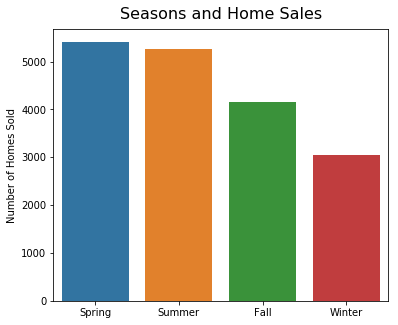

In [180]:
plt.figure(figsize=(6,5))
plt.title('Seasons and Home Sales', fontdict={'fontsize':16}, pad=10)
seasons_graph = sns.barplot(x=df_seasons.index, y=df_seasons.seasons, data=df_seasons)
seasons_graph.set(ylabel='Number of Homes Sold')
plt.show()

> From above we can see that the time of year affects the _number_ of houses sold. But does it have anything to do with price?

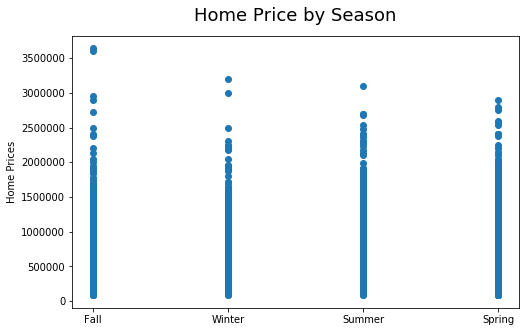

In [192]:
plt.figure(figsize=(8,5))
plt.title("Home Price by Season", fontdict={'fontsize':18}, pad=15)
season_homeprice = plt.scatter(x=df_with_seasons.seasons, y=target)
plt.ylabel('Home Prices')
plt.show()

> It seems that the season in which the house was sold has little effect on the price of the home. 

## Which variables to use in the model?

In [36]:
# Reminder of the variables
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,flr_1.0,flr_1.5,cond_3,cond_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10
0,221900.0,1180,5650,1180,0.0,1955,0.0,98178,47.5112,-122.257,...,1,0,1,0,0,0,1,0,0,0
1,538000.0,2570,7242,2170,400.0,1951,1991.0,98125,47.7210,-122.319,...,0,0,1,0,0,0,1,0,0,0
2,180000.0,770,10000,770,0.0,1933,0.0,98028,47.7379,-122.233,...,1,0,1,0,0,1,0,0,0,0
3,604000.0,1960,5000,1050,910.0,1965,0.0,98136,47.5208,-122.393,...,1,0,0,0,0,0,1,0,0,0
4,510000.0,1680,8080,1680,0.0,1987,0.0,98074,47.6168,-122.045,...,1,0,1,0,0,0,0,1,0,0


### Taking a look at linear relationship between feature and target

In [190]:
# creating a function to give me a lmplot plot for a variable and our target
def create_plot(variable):
    return sns.lmplot(x=variable, y='price', data=df, fit_reg=True, line_kws={'color':'red'});

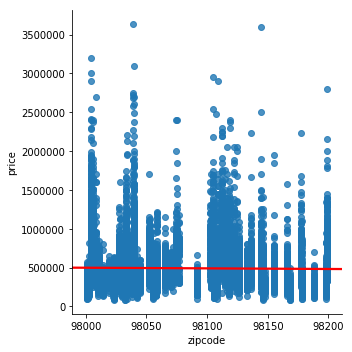

In [191]:
create_plot('zipcode')

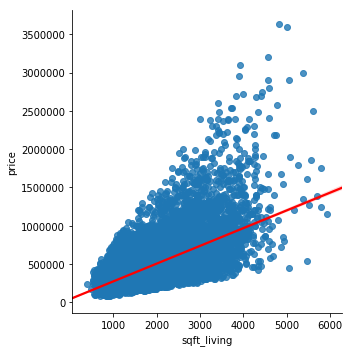

In [39]:
create_plot('sqft_living')

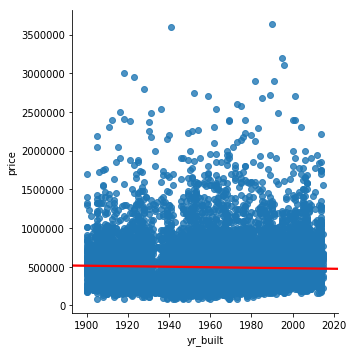

In [40]:
create_plot('yr_built')

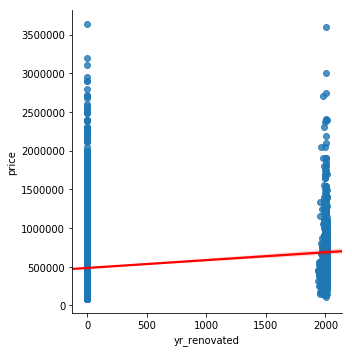

In [41]:
create_plot('yr_renovated')

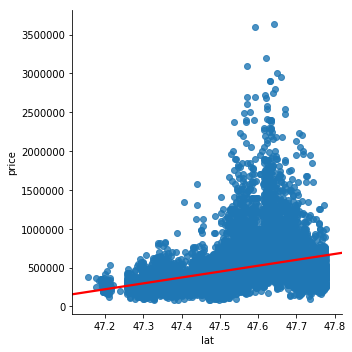

In [42]:
create_plot('lat')

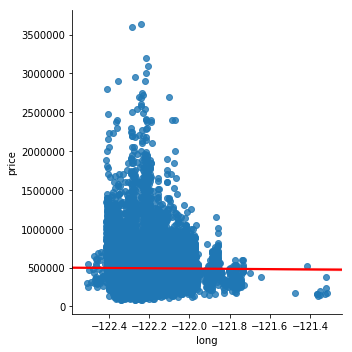

In [43]:
create_plot('long')

> Most of the continuous variables seem to not have a linear relationship with the target. That doesn't necessarily mean I'll throw them away, but I will keep that in mind. 

### Start making some dataframes we want to use in our model

> Below are the predictors we will be starting with put into a regression model raw so that we can compare later on with our modified predictors and target.

In [44]:
raw_df_keep.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [45]:
raw_target = raw_df_keep['price']

In [46]:
raw_pred1 = raw_df_keep[['sqft_living', 'yr_built', 'long', 'lat', 'grade', 'bathrooms']]

In [47]:
formula = ("raw_target ~ raw_pred1")
model = ols(formula=formula, data=raw_pred1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             raw_target   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     6548.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:35:43   Log-Likelihood:            -2.9620e+05
No. Observations:               21597   AIC:                         5.924e+05
Df Residuals:                   21590   BIC:                         5.925e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.512e+07   1.56e+06    -22.472      0.000   -3.82e+07   -3.21e+07
raw_pred1[0]   172.1142      3.080     55.884      0.000     166.077     178.151
raw_pred1[1] -3058.6076     67.800    -45.112      0.000   -3191.501   -2925.715
raw_pred1[2] -1.283e+05   1.19e+04    -10.824      0.000   -1.52e+05   -1.05e+05
raw_pred1[3]  5.181e+05   1.12e+04     46.400      0.000    4.96e+05     5.4e+05
raw_pred1[4]  1.218e+05   2132.721     57.112      0.000    1.18e+05    1.26e+05
raw_pred1[5]  3.448e+04   3302.632     10.440      0.000     2.8e+04     4.1e+04
==============================================================================
Omnibus:                    19573.794   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1917943.598
Skew:                           3.991   Prob(JB):                         0.00
Kurtosis:                      48.471   Cond. No.                     3.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Straight away we see that, without preprocessing, our R2 score is pretty high.

> Note: I realize a reason it could be high is that I've only included features that I've deemed to be significant due to data preprocessing. 

### Now start using the cleaned dataframe

> The predictors were chosen because of thier correlation to the target, as well as some location variables, which I included intuitively because location is always an indicator of a home value

In [193]:
df_pred1 = pd.concat([df.loc[:, ['sqft_living', 'yr_built', 'long', 'lat']], grd_dum, bath_dum], axis=1)

df_pred1.head()

,sqft_living,yr_built,long,lat,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0
0,1180,1955,-122.257,47.5112,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2570,1951,-122.319,47.7210,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,770,1933,-122.233,47.7379,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1960,1965,-122.393,47.5208,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1680,1987,-122.045,47.6168,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [311]:
formula = ("target ~ df_pred1['sqft_living']")
model = ols(formula=formula, data=df_pred1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.079e+04
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:45:58   Log-Likelihood:            -2.4526e+05
No. Observations:               17890   AIC:                         4.905e+05
Df Residuals:                   17888   BIC:                         4.905e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.298e+04   4610.959      9.322      0.000    3.39e+04     5.2e+04
df_pred1['sqft_living']   231.4282      2.228    103.855      0.000     227.060     235.796
==============================================================================
Omnibus:                     8658.209   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99250.247
Skew:                           2.044   Prob(JB):                         0.00
Kurtosis:                      13.791   Cond. No.                     5.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The power of square feet alone.

***

Interesting--our R2 score is actually slightly lower than it was with the raw data. I don't undertand enough to be able to say why that is the case.<br>
We should also note that all of our p-values are statistically significant, with the exception of the 12th predictor: bath_1.25. Let's see what happens when we substitute in our target after it has been log-transformed. 

In [52]:
target_test = np.log(target)
target_test.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [53]:
formula = ("target_test ~ df_pred1")
model = ols(formula=formula, data=df_pred1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            target_test   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2361.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:37:07   Log-Likelihood:                -1119.4
No. Observations:               17890   AIC:                             2279.
Df Residuals:                   17870   BIC:                             2435.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -36.3930      2.222    -16.381      0.000     -40.748     -32.038
df_pred1[0]      0.0002    4.5e-06     45.536      0.000       0.000       0.000
df_pred1[1]     -0.0047   9.45e-05    -50.085      0.000      -0.005      -0.005
df_pred1[2]      0.0539      0.017      3.230      0.001       0.021       0.087
df_pred1[3]      1.3804      0.015     94.996      0.000       1.352       1.409
df_pred1[4]     -1.0919      0.032    -33.714      0.000      -1.155      -1.028
df_pred1[5]     -0.9193      0.026    -35.003      0.000      -0.971      -0.868
df_pred1[6]     -0.7195      0.025    -28.826      0.000      -0.768      -0.671
df_pred1[7]     -0.5107      0.025    -20.846      0.000      -0.559      -0.463
df_pred1[8]     -0.2934      0.024    -12.065      0.000      -0.341      -0.246
df_pred1[9]     -0.1420      0.026     -5.564      0.000      -0.192      -0.092
df_pred1[10]    -0.2434      0.016    -15.426      0.000      -0.274      -0.212
df_pred1[11]    -0.0159      0.098     -0.161      0.872      -0.209       0.177
df_pred1[12]    -0.1953      0.016    -12.251      0.000      -0.226      -0.164
df_pred1[13]    -0.1598      0.015    -10.840      0.000      -0.189      -0.131
df_pred1[14]    -0.1454      0.015     -9.559      0.000      -0.175      -0.116
df_pred1[15]    -0.1177      0.015     -8.029      0.000      -0.146      -0.089
df_pred1[16]    -0.0971      0.013     -7.210      0.000      -0.123      -0.071
df_pred1[17]    -0.0824      0.015     -5.487      0.000      -0.112      -0.053
df_pred1[18]    -0.0792      0.016     -4.818      0.000      -0.111      -0.047
==============================================================================
Omnibus:                      373.182   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              760.416
Skew:                           0.103   Prob(JB):                    7.55e-166
Kurtosis:                       3.989   Cond. No.                     3.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> In the above our R2 breaks .70, which is the first time it's done that after many experiments I've tried. Our rogue variable has actually increased it's p-value. Before we get rid of that variable, let's see if log-transforming our continuous variables does anything. 

In [264]:
df_test = df.copy()

In [265]:
df_test['long'] = abs(df_test['long'])# getting long's absolute value

In [266]:
transform = ['sqft_living', 'lat', 'yr_built', 'long']
for var in transform:
    df_test[var] = df_test[var].map(lambda x: np.log(x))

In [267]:
df_pred1_log = pd.concat([df_test.loc[:, ['sqft_living', 'yr_built', 'long', 'lat']], grd_dum, bath_dum], axis=1)
print(df_pred1_log.shape)
df_pred1_log.head()

(17890, 19)


,sqft_living,yr_built,long,lat,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,bath_1.0,bath_1.25,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0
0,7.073270,7.578145,4.806125,3.860965,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,7.851661,7.576097,4.806632,3.865372,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,6.646391,7.566828,4.805929,3.865726,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,7.580700,7.583248,4.807237,3.861168,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,7.426549,7.594381,4.804390,3.863186,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [268]:
formula = ("target_test ~ df_pred1_log")
model = ols(formula=formula, data=df_pred1_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            target_test   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2336.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:12:45   Log-Likelihood:                -1187.4
No. Observations:               17890   AIC:                             2415.
Df Residuals:                   17870   BIC:                             2571.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -143.0181     10.804    -13.237      0.000    -164.195    -121.841
df_pred1_log[0]      0.3797      0.009     43.585      0.000       0.363       0.397
df_pred1_log[1]     -9.2328      0.187    -49.491      0.000      -9.598      -8.867
df_pred1_log[2]     -6.3477      2.049     -3.099      0.002     -10.363      -2.332
df_pred1_log[3]     65.9207      0.694     95.049      0.000      64.561      67.280
df_pred1_log[4]     -1.1485      0.032    -35.599      0.000      -1.212      -1.085
df_pred1_log[5]     -1.0039      0.026    -38.767      0.000      -1.055      -0.953
df_pred1_log[6]     -0.8252      0.025    -33.667      0.000      -0.873      -0.777
df_pred1_log[7]     -0.6131      0.024    -25.385      0.000      -0.660      -0.566
df_pred1_log[8]     -0.3721      0.024    -15.377      0.000      -0.420      -0.325
df_pred1_log[9]     -0.1901      0.026     -7.441      0.000      -0.240      -0.140
df_pred1_log[10]    -0.2553      0.016    -16.145      0.000      -0.286      -0.224
df_pred1_log[11]    -0.0488      0.099     -0.494      0.621      -0.242       0.145
df_pred1_log[12]    -0.2297      0.016    -14.514      0.000      -0.261      -0.199
df_pred1_log[13]    -0.2020      0.015    -13.842      0.000      -0.231      -0.173
df_pred1_log[14]    -0.1879      0.015    -12.465      0.000      -0.217      -0.158
df_pred1_log[15]    -0.1593      0.015    -10.929      0.000      -0.188      -0.131
df_pred1_log[16]    -0.1370      0.013    -10.216      0.000      -0.163      -0.111
df_pred1_log[17]    -0.1095      0.015     -7.273      0.000      -0.139      -0.080
df_pred1_log[18]    -0.1034      0.016     -6.271      0.000      -0.136      -0.071
==============================================================================
Omnibus:                      373.719   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.682
Skew:                           0.130   Prob(JB):                    2.63e-158
Kurtosis:                       3.952   Cond. No.                     7.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Not much changed, except our bad p-value went down a little. Still, we won't use it since we aren't suppose to use anything over 0.05. 

In [ ]:
# df_pred1_log.drop('bath_1.25', axis=1, inplace=True)

In [473]:
df_pred1_log.head()

,sqft_living,yr_built,long,lat,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,bath_1.0,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0
0,7.073270,7.578145,4.806125,3.860965,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,7.851661,7.576097,4.806632,3.865372,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,6.646391,7.566828,4.805929,3.865726,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,7.580700,7.583248,4.807237,3.861168,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,7.426549,7.594381,4.804390,3.863186,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [279]:
#make sure it worked 
formula = ("target_test ~ df_pred1_log")
model = ols(formula=formula, data=df_pred1_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            target_test   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2466.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:15:39   Log-Likelihood:                -1187.5
No. Observations:               17890   AIC:                             2413.
Df Residuals:                   17871   BIC:                             2561.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -143.0308     10.804    -13.239      0.000    -164.208    -121.854
df_pred1_log[0]      0.3799      0.009     43.658      0.000       0.363       0.397
df_pred1_log[1]     -9.2317      0.187    -49.489      0.000      -9.597      -8.866
df_pred1_log[2]     -6.3456      2.049     -3.098      0.002     -10.361      -2.330
df_pred1_log[3]     65.9187      0.694     95.050      0.000      64.559      67.278
df_pred1_log[4]     -1.1486      0.032    -35.606      0.000      -1.212      -1.085
df_pred1_log[5]     -1.0041      0.026    -38.781      0.000      -1.055      -0.953
df_pred1_log[6]     -0.8254      0.025    -33.682      0.000      -0.873      -0.777
df_pred1_log[7]     -0.6133      0.024    -25.398      0.000      -0.661      -0.566
df_pred1_log[8]     -0.3723      0.024    -15.387      0.000      -0.420      -0.325
df_pred1_log[9]     -0.1903      0.026     -7.446      0.000      -0.240      -0.140
df_pred1_log[10]    -0.2542      0.016    -16.221      0.000      -0.285      -0.224
df_pred1_log[11]    -0.2287      0.016    -14.565      0.000      -0.259      -0.198
df_pred1_log[12]    -0.2011      0.014    -13.896      0.000      -0.229      -0.173
df_pred1_log[13]    -0.1870      0.015    -12.503      0.000      -0.216      -0.158
df_pred1_log[14]    -0.1584      0.014    -10.952      0.000      -0.187      -0.130
df_pred1_log[15]    -0.1362      0.013    -10.238      0.000      -0.162      -0.110
df_pred1_log[16]    -0.1086      0.015     -7.263      0.000      -0.138      -0.079
df_pred1_log[17]    -0.1026      0.016     -6.253      0.000      -0.135      -0.070
==============================================================================
Omnibus:                      373.197   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.575
Skew:                           0.129   Prob(JB):                    4.58e-158
Kurtosis:                       3.951   Cond. No.                     7.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [393]:
df_pred1_log.iloc[:,4:10].head()

,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


## Model training and MSE

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [490]:
X = df_pred1_log.copy()
y = target_test.copy()

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(y_test))

13417 4473


In [492]:
X_train.head()

,sqft_living,yr_built,long,lat,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,bath_1.0,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0
11992,7.377759,7.564757,4.806698,3.863771,0,0,1,0,0,0,0,0,1,0,0,0,0,0
13922,7.293018,7.593374,4.805274,3.863280,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11903,7.402452,7.606387,4.807008,3.861971,0,0,1,0,0,0,0,0,0,0,0,1,0,0
12476,7.565275,7.562162,4.806673,3.864101,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3789,7.207860,7.571474,4.806387,3.859670,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [493]:
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [494]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

### First run through MSE scores

In [495]:
print(train_mse)
print(test_mse)

0.06723056175187694
0.06589720896722502


Second run-through

In [496]:
print(train_mse)
print(test_mse)

0.06723056175187694
0.06589720896722502


> These seem suspiciously close together, so I will loop through and visualize multiple calculations of the MSE scores.
The code was taken from a Flatiron lab on model regression. 

In [497]:
train_err = []
test_err = []
t_sizes = list(range(5,100,5))

In [498]:
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))

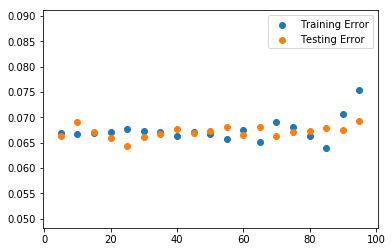

In [499]:
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [500]:
for i in range(19):
    print(train_err[i], test_err[i])

0.06689679974402929 0.06625577639343268
0.06663650535612838 0.06900507311923351
0.06684108640467776 0.06712041089888923
0.06712888717723026 0.06585288359154937
0.06770939159674963 0.06442064014839968
0.0672469951421857 0.06606400753273452
0.06704680655672116 0.06664727404902063
0.06639591434906977 0.067676199631708
0.06699829386120046 0.06684655750579777
0.06664869492359334 0.06725355062256697
0.06565207594929107 0.06811365462549686
0.06748288121477991 0.06657460913194665
0.06506580076614273 0.06816726050986524
0.06897717378336936 0.06621476449883341
0.0681437975415029 0.06711719610811966
0.06636746043053685 0.06722870638110626
0.06395259982040057 0.06784034154104801
0.07057701679587468 0.06758198420786059
0.07533155972639033 0.06922339699495411


In [501]:
from sklearn.model_selection import cross_val_score

In [502]:
cv_10_fold = cross_val_score(linreg, df_pred1_log, target_test, cv=10, scoring='neg_mean_squared_error')

In [503]:
print(cv_10_fold)
print(np.mean(cv_10_fold))

[-0.0648596  -0.07178493 -0.0696914  -0.07019113 -0.06610245 -0.06755687
 -0.06861087 -0.07328716 -0.06751515 -0.05362619]
-0.06732257538296174


### ...a few other test to flesh out results

In [504]:
from sklearn.metrics import mean_absolute_error

In [505]:
mae_train = mean_absolute_error(y_train, y_hat_train)
mae_test = mean_absolute_error(y_test, y_hat_test)

In [506]:
print(mae_train)
print(mae_test)

0.20799474254097913
0.20258668409675873


In [507]:
from sklearn.metrics import r2_score as r2

In [508]:
r2_train = r2(y_train, y_hat_train)
r2_test = r2(y_test, y_hat_test)

In [509]:
print(r2_train)
print(r2_test)

0.6812124924263948
0.7025868641244561


In [551]:
print(y_train[0:10])

17159    12.983101
12480    13.071070
12182    13.661776
12853    12.542545
15642    12.254863
20094    12.985398
13683    12.388394
16958    13.120361
8361     12.800780
1309     12.323856
Name: price, dtype: float64


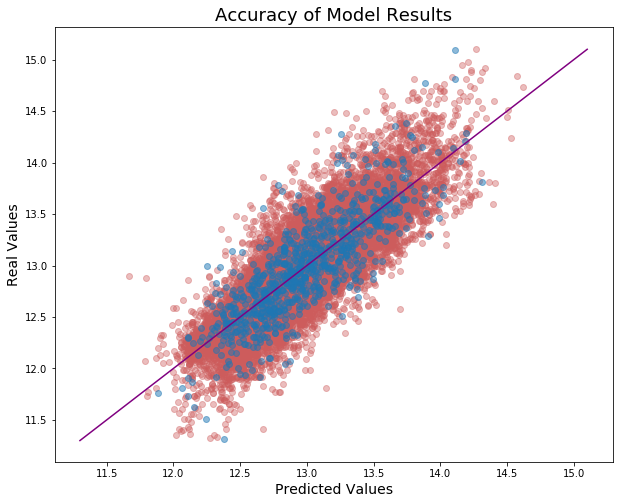

In [573]:
plt.figure(figsize=(10,8))

plt.scatter(x=y_hat_test, y=y_test, alpha=.4, c='indianred')

plt.scatter(x=y_hat_train, y=y_train, alpha=.5)
plt.plot([11.3, 15.1], [11.3, 15.1], color='purple')

plt.title("Accuracy of Model Results", fontdict={'fontsize':18})
plt.xlabel("Predicted Values", fontdict={'fontsize':14})
plt.ylabel("Real Values", fontdict={'fontsize':14})

plt.show()

When we plot our estimated target values against our actual target values, for both our testing and training data, we see both follow a strongly positive correlation. 

### Experiment with scaling data

Took this idea from Jeff Herman's study group on scaling & normalization. 

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [320]:
scaler = MinMaxScaler()

In [321]:
scaler.fit(df_pred1_log)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [322]:
scaler.fit(target_test.values.reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [323]:
scaled_target = scaler.transform(target_test.values.reshape(-1, 1))

In [324]:
scaled_data = scaler.transform(df_pred1_log)

In [329]:
scaled_data

array([[-1.1181605 , -0.98505395, -1.71587538, ..., -2.98297277,
        -2.98297277, -2.98297277],
       [-0.91294367, -0.98559392, -1.71574171, ..., -2.98297277,
        -2.98297277, -2.98297277],
       [-1.23070386, -0.98803759, -1.71592714, ..., -2.98297277,
        -2.98297277, -2.98297277],
       ...,
       [-1.09060654, -0.97800178, -1.7155478 , ..., -2.71933059,
        -2.98297277, -2.98297277],
       [-0.94106332, -0.97721518, -1.71564905, ..., -2.71933059,
        -2.98297277, -2.98297277],
       [-1.0378843 , -0.97852749, -1.71628111, ..., -2.71933059,
        -2.98297277, -2.98297277]])

In [332]:
linreg.coef_

array([[ 0.27335613, -0.14563155,  0.01704959,  0.23441496, -0.02908009,
        -0.30748427, -0.26648283, -0.2196412 , -0.16369812, -0.10093264,
        -0.05190392, -0.07018256, -0.06235229, -0.05616636, -0.05226382,
        -0.04636811, -0.03905121, -0.03341779, -0.03089399]])

In [333]:
formula = ("scaled_target ~ scaled_data")
model = ols(formula=formula, data=df_pred1_log).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          scaled_target   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     2466.
Date:                Thu, 20 Jun 2019   Prob (F-statistic):               0.00
Time:                        12:07:34   Log-Likelihood:                 22663.
No. Observations:               17890   AIC:                        -4.529e+04
Df Residuals:                   17871   BIC:                        -4.514e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          94.1106      3.884     24.232      0.000      86.498     101.723
scaled_data[0]      0.3799      0.009     43.658      0.000       0.363       0.397
scaled_data[1]     -9.2317      0.187    -49.489      0.000      -9.597      -8.866
scaled_data[2]     -6.3456      2.049     -3.098      0.002     -10.361      -2.330
scaled_data[3]     65.9187      0.694     95.050      0.000      64.559      67.278
scaled_data[4]     -1.1486      0.032    -35.606      0.000      -1.212      -1.085
scaled_data[5]     -1.0041      0.026    -38.781      0.000      -1.055      -0.953
scaled_data[6]     -0.8254      0.025    -33.682      0.000      -0.873      -0.777
scaled_data[7]     -0.6133      0.024    -25.398      0.000      -0.661      -0.566
scaled_data[8]     -0.3723      0.024    -15.387      0.000      -0.420      -0.325
scaled_data[9]     -0.1903      0.026     -7.446      0.000      -0.240      -0.140
scaled_data[10]    -0.2542      0.016    -16.221      0.000      -0.285      -0.224
scaled_data[11]    -0.2287      0.016    -14.565      0.000      -0.259      -0.198
scaled_data[12]    -0.2011      0.014    -13.896      0.000      -0.229      -0.173
scaled_data[13]    -0.1870      0.015    -12.503      0.000      -0.216      -0.158
scaled_data[14]    -0.1584      0.014    -10.952      0.000      -0.187      -0.130
scaled_data[15]    -0.1362      0.013    -10.238      0.000      -0.162      -0.110
scaled_data[16]    -0.1086      0.015     -7.263      0.000      -0.138      -0.079
scaled_data[17]    -0.1026      0.016     -6.253      0.000      -0.135      -0.070
==============================================================================
Omnibus:                      373.197   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.575
Skew:                           0.129   Prob(JB):                    4.58e-158
Kurtosis:                       3.951   Cond. No.                     9.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Scaled data with MSEs

In [290]:
X = scaled_data.copy()
y = scaled_target.copy()

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(y_test))

13417 4473


In [300]:
train_err = []
test_err = []
for i in range(21):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))

In [307]:
for i in range(21):
    print(train_err[i], test_err[i])

0.004624056182385222 0.004563717418012585
0.004668615092485196 0.004432897162662035
0.004598326898752805 0.004641885530088368
0.004578229744277609 0.004701746525397917
0.00461395724369929 0.004594575118843258
0.004586680492578857 0.004671028400122784
0.00451728992518249 0.004880199769587754
0.0045941502829063615 0.00465158431788186
0.004636785970201466 0.004524337293362845
0.004592427464608439 0.004659191996212219
0.0045328808495476176 0.004833261568973804
0.00463844245245828 0.004516950668619559
0.004658961430715689 0.004457817109662739
0.0045928336341194455 0.004658357316364539
0.00463458632854585 0.004530849768656186
0.004616018124790773 0.00458637875680798
0.00461034883890632 0.004604902165441772
0.0045825050201672695 0.0046894588602988336
0.004601985076153263 0.004625595289338977
0.004590776756549823 0.004663757208090427
0.0045980422404513005 0.004637577255180281


## Final Thoughts

Based on the consistent results of our model and various validation tests (mean squared error, mean absolute error, cross evaluation, R^2 scores for training and testing data, and plotting predicted values against real values), I would conclude at the very least that our model is _sound_.

As far as its predictive power, I would have liked it to be higher than .71, but I am satisfied with it for now. The final variables used were: 
* sqft_living
* yr_built 
* long 
* lat 
* grade dummies
* bathroom dummies


> Square footage remained the most powerful of the predictors, even as it was the variable with the strongest correlation with the target from the beginning.

### Some questions I have about my results:

* Since one of the dummy columns had to be dropped in order to use them in the OLS model, how do you interpret the magnitude of effect that the dropped dummy variable has on the target?
* Why are most of the variables negative when when we first tested them, they mostly had a positive correlation with the target?
* I know that the distribution of some of my variables are not normal. To what extent is this affecting the model? 
* Why is my Jacque-Bera so high?
* Why is my condition number so high?
* What does it mean for a model to have skew and kurtosis and can it have good skew and kurtosis despite being made up of non-normally distributed variables?

### Future Analysis

* Feature engineer the lat & long to get some categorical data put into custom bins.
* Map the lat & long either on top of or next to an actual map of the are and compare.
* See if there's any useful data lurking in the zip codes. 
* See if the prices and square footage of the 15 neighbors are really carbon copies of the home in question, or possibly find some nuance there. 
* Investigate duplicates among the ID's for the homes.

## Scratch Paper

In [ ]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

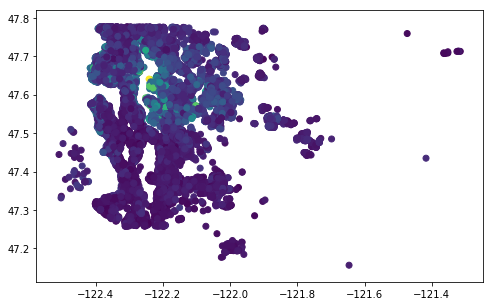

In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(x=df.long, y=df.lat, c=df.price)
plt.show()

In [62]:
y = target_test
x = df_pred1_log
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2365.
Date:                Mon, 17 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:11:54   Log-Likelihood:                -1109.0
No. Observations:               17890   AIC:                             2258.
Df Residuals:                   17870   BIC:                             2414.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         444.1512     48.870      9.088      0.000     348.361     539.941
sqft_living     0.3785      0.009     43.681      0.000       0.362       0.396
yr_built       -9.3835      0.186    -50.414      0.000      -9.748      -9.019
long            0.0583      0.019      3.089      0.002       0.021       0.095
lat            67.9455      0.709     95.816      0.000      66.556      69.335
zipcode       -54.9410      4.376    -12.554      0.000     -63.519     -46.363
grd_5          -1.1443      0.032    -35.624      0.000      -1.207      -1.081
grd_6          -0.9936      0.026    -38.524      0.000      -1.044      -0.943
grd_7          -0.8209      0.024    -33.641      0.000      -0.869      -0.773
grd_8          -0.6100      0.024    -25.366      0.000      -0.657      -0.563
grd_9          -0.3698      0.024    -15.352      0.000      -0.417      -0.323
grd_10         -0.1883      0.025     -7.402      0.000      -0.238      -0.138
bath_1.0       -0.2558      0.016    -16.392      0.000      -0.286      -0.225
bath_1.5       -0.2314      0.016    -14.803      0.000      -0.262      -0.201
bath_1.75      -0.2065      0.014    -14.327      0.000      -0.235      -0.178
bath_2.0       -0.1909      0.015    -12.814      0.000      -0.220      -0.162
bath_2.25      -0.1674      0.014    -11.616      0.000      -0.196      -0.139
bath_2.5       -0.1396      0.013    -10.540      0.000      -0.166      -0.114
bath_2.75      -0.1136      0.015     -7.626      0.000      -0.143      -0.084
bath_3.0       -0.1043      0.016     -6.388      0.000      -0.136      -0.072
==============================================================================
Omnibus:                      320.134   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.830
Skew:                           0.110   Prob(JB):                    9.24e-131
Kurtosis:                       3.869   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

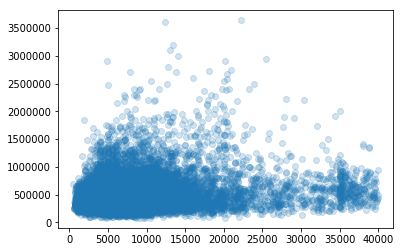

In [40]:
create_plot('sqft_lot')

Dont include: 
* view 
* lat 
* long
* zipcode
* sqft_living15
* sqft_lot15

### Notes:
* there are no duplicates
* waterfront only had 146 affirmative values, so I filled the nulls (2736) with negative values
* did the same with view & yr_renovated
* Removed outliers from bedrooms ( >7 rooms)
* Removed outliers from price ( >3840000)
* removed outliers from grade ( >11 & 4 (only one value for 4))
* removed outliers from sqft_living ( >6000)

In [264]:
df_pred = df.loc[:, ['yr_built', 'bedrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_lot', 'bathrooms']]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


### Scatter matrix with raw variables

(array([3931., 8752., 4640., 1323.,  582.,  322.,  185.,  116.,  226.,
         169.]),
 array([  520.,  4464.,  8408., 12352., 16296., 20240., 24184., 28128.,
        32072., 36016., 39960.]),
 <a list of 10 Patch objects>)

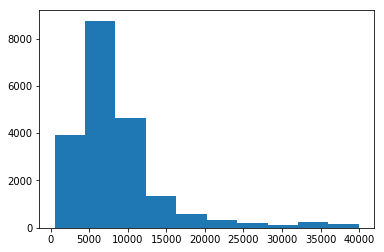

In [498]:
plt.hist(df.sqft_lot)

In [412]:
from statsmodels.formula.api import ols

In [275]:
target = 'price'
x_cols = ['sqft_living', 'grade']
predictors = '+'.join(x_cols)
formula = target + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'grade' is not defined
    price~sqft_living+grade
                      ^^^^^

### Making a second experimental dataframe and transforming variables

In [402]:
df2 = df.copy()

In [406]:
# nn = ['price', 'sqft_living']
# for thing in nn:
#     df2[thing] = df2[thing].map(lambda x: np.log(x))


# code has been run

### Scatter matrix with log variables (price and sqft_living)

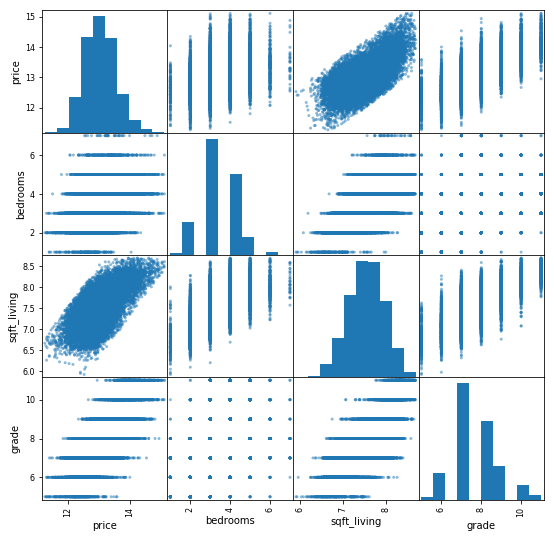

In [410]:
pd.plotting.scatter_matrix(df2_pred, figsize=(9,9));